# DESCRIPTION 
Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. Zalando seeks to replace the original MNIST dataset

Training set - 60,000 examples
Test set - 10,000 examples
Each example is a 28x28 grayscale image
10 classes

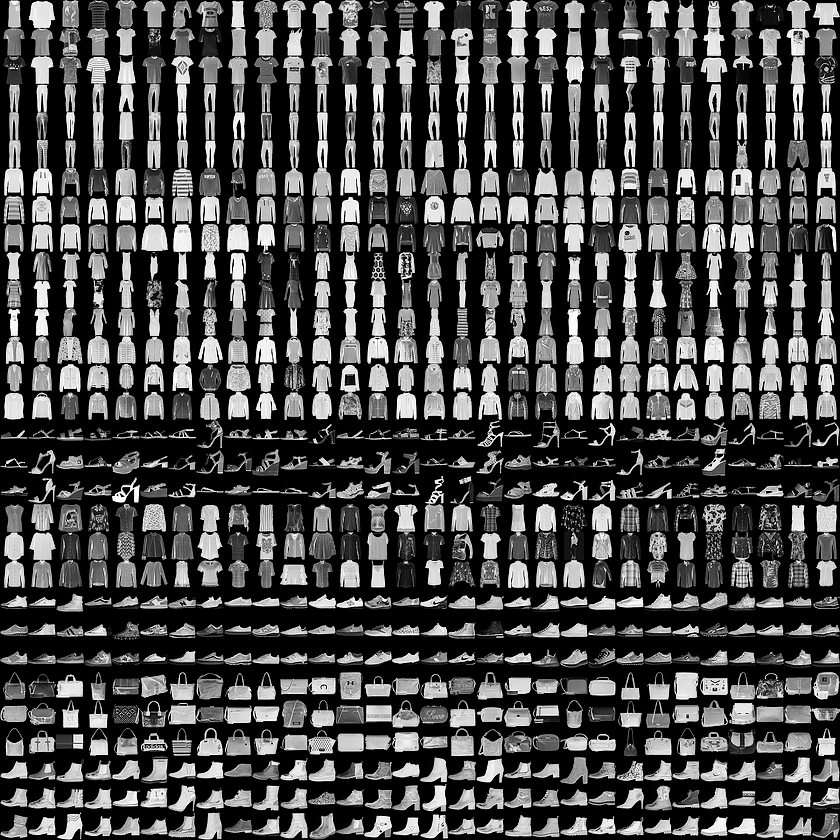

### Importing required libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from keras.optimizers import SGD , RMSprop

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("/cxldata/datasets/project/fashion-mnist")

# https://github.com/zalandoresearch/fashion-mnist#get-the-data
#from keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

W0502 10:51:56.181232 140226260215616 deprecation.py:323] From <ipython-input-2-14b08a1810fa>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0502 10:51:56.183102 140226260215616 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0502 10:51:56.185478 140226260215616 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future ve

Extracting /cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz


W0502 10:51:56.570951 140226260215616 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0502 10:51:56.640663 140226260215616 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting /cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz


In [3]:
fashion_mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f88abed9ac8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f88abd9aa90>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f88abd9ad68>)

### Loading Training and Testing Data

In [4]:
train_data = fashion_mnist.train.images                         # Returns np.array
train_labels = np.asarray(fashion_mnist.train.labels, dtype=np.int32)
x_train, y_train = train_data, train_labels

eval_data = fashion_mnist.test.images                           # Returns np.array
eval_labels = np.asarray(fashion_mnist.test.labels, dtype=np.int32)
x_test, y_test = eval_data, eval_labels

### Reshaping data for Neural Network

In [6]:
x_train = x_train.reshape((55000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

print(f'Shape of our X_Train dataset is ; {x_train.shape}')
print(f'Shape of our Y_Train dataset is ; {y_train.shape}')
print(f'Shape of our X_Test dataset is ; {x_test.shape}')
print(f'Shape of our Y_Test dataset is ; {y_test.shape}')

Shape of our X_Train dataset is ; (55000, 28, 28, 1)
Shape of our Y_Train dataset is ; (55000,)
Shape of our X_Test dataset is ; (10000, 28, 28, 1)
Shape of our Y_Test dataset is ; (10000,)


### Visualizing some Training and Testing Data

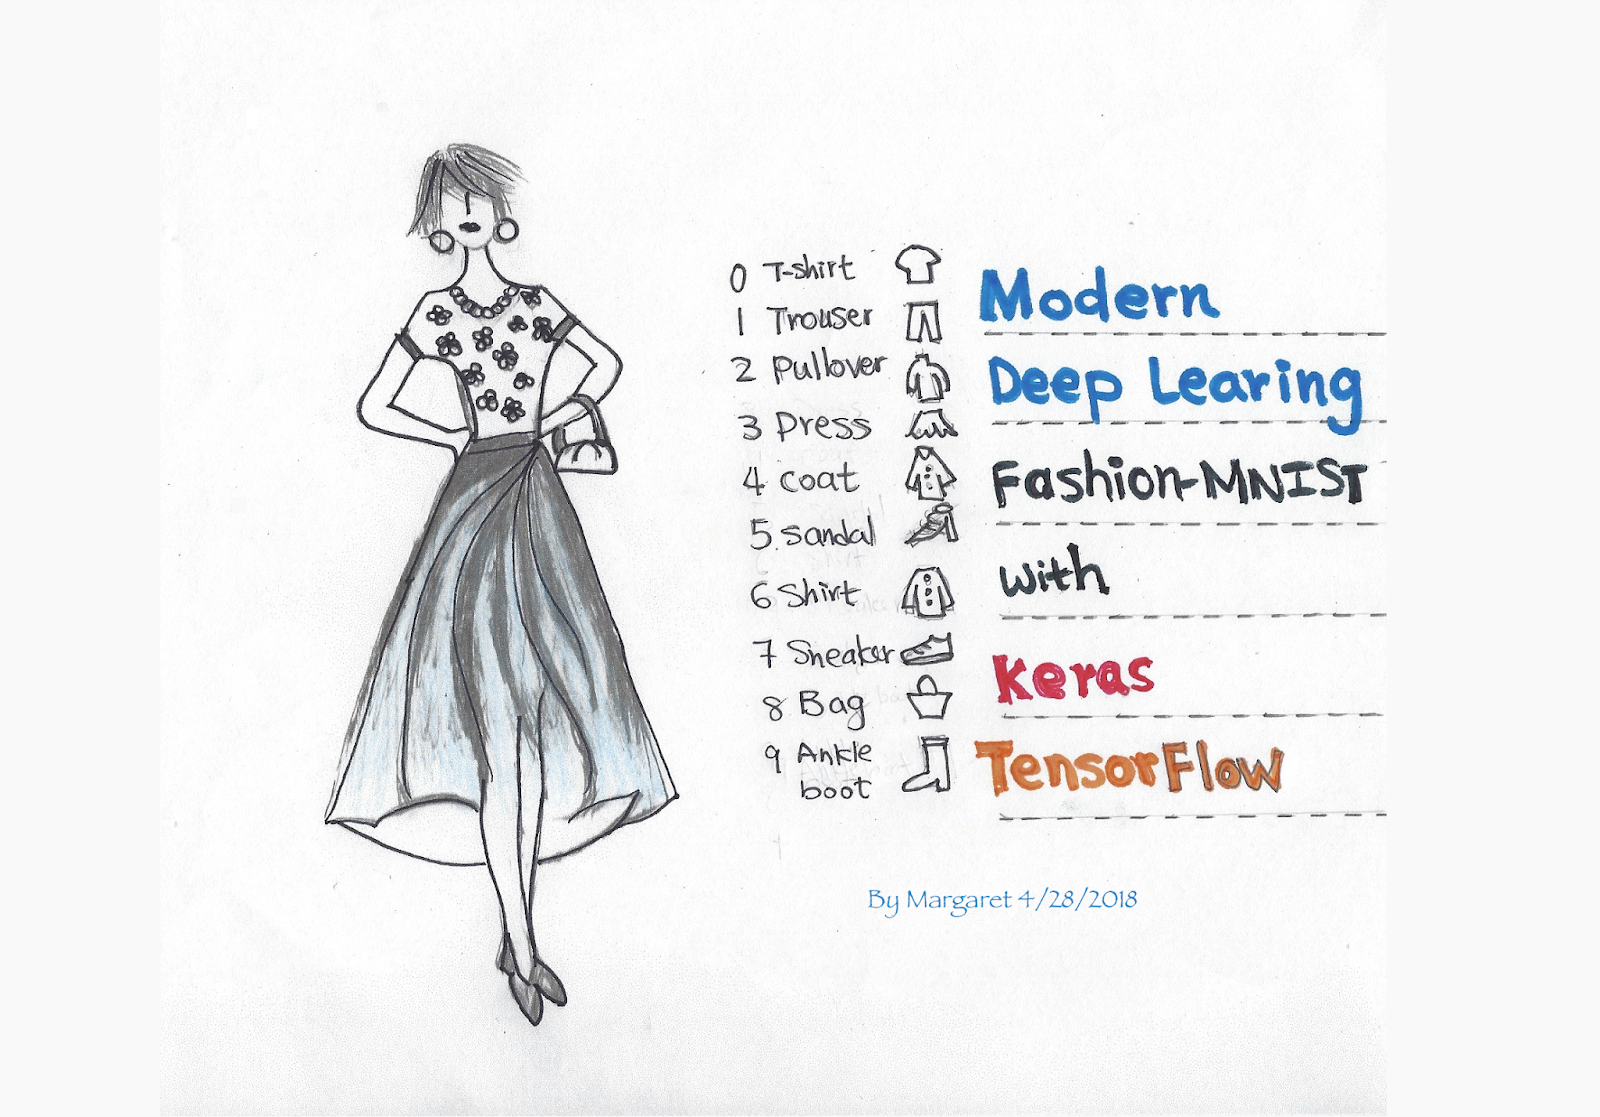

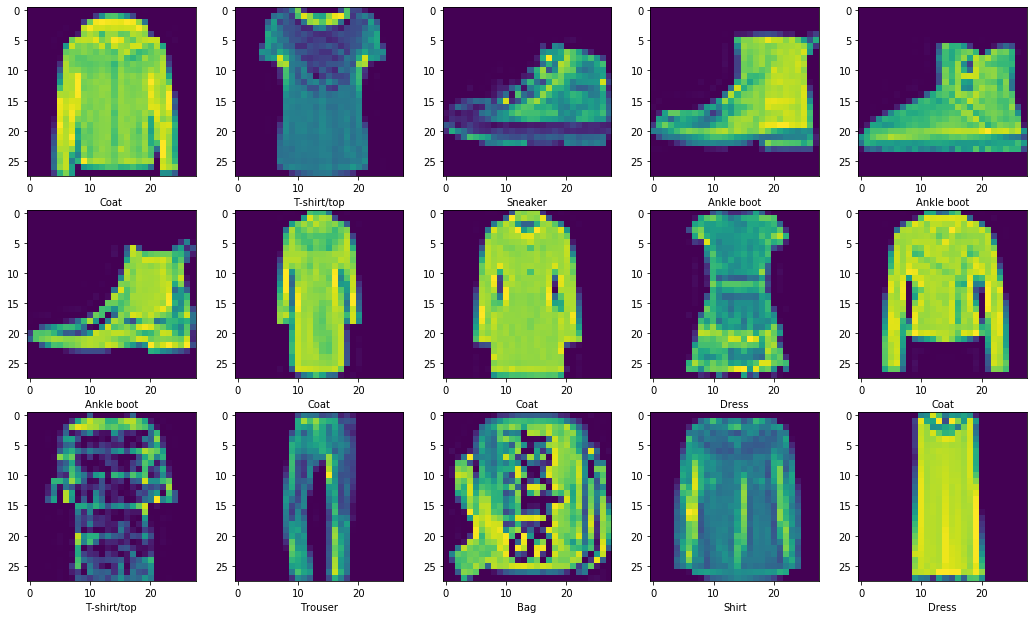

In [7]:
# Squeeze helps to get rid of useless one dimension. For eg. it produces [7,8,9] instead of [[[7,8,9]]].

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']
class_mapping = list(zip(class_names, range(len(class_names))))

plt.figure(figsize=(18,18)) 
for i in range(0,15):
    plt.subplot(5,5,i+1)    
    plt.imshow(np.squeeze(x_train[i]))
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Model Building, Training, Testing and Visualizing : KERAS 

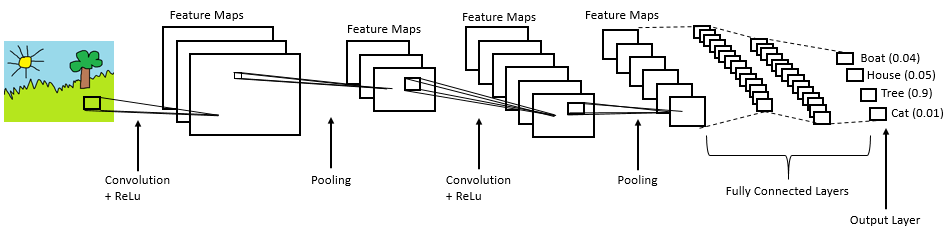

#### It's just a representation. In the output layer, we are predicting Clothes type (Not boat, house, tree etc.)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Shape of our y_train dataset is ; {y_train.shape}')
print(f'Shape of our y_train dataset is ; {y_test.shape}')

Shape of our y_train dataset is ; (55000, 10)
Shape of our y_train dataset is ; (10000, 10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 10000 samples
Epoch 1/3
55000/55000 [==============================] - 9s 168us/step - loss: 0.4544 

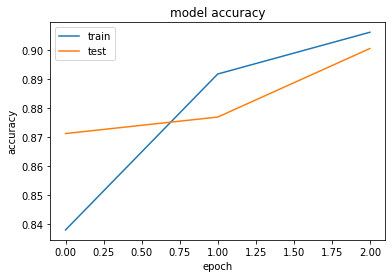

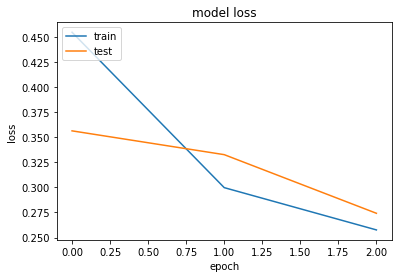

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=3, batch_size=100)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Model Accuracy on Test Data is {(test_accuracy)*100}')
print(f'Model Loss on Test Data is {test_loss}')

10000/10000 [==============================] - 1s 80us/step
Model Accuracy on Test Data is 90.06
Model Loss on Test Data is 0.27411680537462235


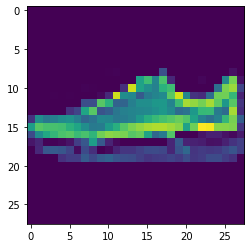

"It's a Sneaker"

In [17]:
def model_prediction(validation_data,image_index):
    plt.figure()
    plt.imshow(np.squeeze(validation_data[image_index]))
    plt.show()
    
    y_pred = model.predict(validation_data)[image_index]
    final_pred= np.argmax(y_pred)
    for i in range(len(class_mapping)):
        if final_pred == i:
            return f'It\'s a {class_mapping[i][0]}'
    
model_prediction(x_test,9)